In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from numpy import random
from numpy.linalg import inv, qr


file_path = 'weapons_data.csv'

data = pd.read_csv(file_path)

data

,Weapon Name,Kills,Shots Fired,Hits,Health Damage,Armor Damage
0,AK-47,3825.0,78575.0,11690.0,392804.0,44602.0
1,AUG,40.0,585.0,134.0,3955.0,181.0
2,AWP,901.0,2080.0,1004.0,81590.0,1045.0
3,CZ75 Auto,12.0,158.0,49.0,1363.0,185.0
4,Decoy Grenade,0.0,32.0,0.0,0.0,0.0
5,Desert Eagle,174.0,2122.0,445.0,21707.0,884.0
6,Dual Berettas,119.0,1905.0,392.0,13390.0,1383.0
7,FAMAS,149.0,3211.0,620.0,15783.0,3102.0
8,Five-SeveN,88.0,1426.0,310.0,10336.0,517.0
9,Flashbang,0.0,9792.0,49.0,30.0,1.0


In [3]:
data.loc[16, :].T

Weapon Name         M4A4
Kills              370.0
Shots Fired       8220.0
Hits              1420.0
Health Damage    39625.0
Armor Damage      7848.0
Name: 16, dtype: object

In [4]:
data.loc[15, :].T

Weapon Name          M4A1
Kills              2237.0
Shots Fired       47357.0
Hits               7951.0
Health Damage    229551.0
Armor Damage      46768.0
Name: 15, dtype: object

In [5]:
data.loc[:, 'Kills'].sum()

10495.0

In [6]:
m4a1_s_percentage = data.loc[15, 'Kills']/data.loc[:,'Kills'].sum()
m4a4_percentage = data.loc[16,'Kills']/data.loc[:,'Kills'].sum()


m4a1_s_percentage/m4a4_percentage

6.045945945945946

In [7]:
data.sort_values(by='Kills', ascending=False)

,Weapon Name,Kills,Shots Fired,Hits,Health Damage,Armor Damage
0,AK-47,3825.0,78575.0,11690.0,392804.0,44602.0
15,M4A1,2237.0,47357.0,7951.0,229551.0,46768.0
2,AWP,901.0,2080.0,1004.0,81590.0,1045.0
10,Galil AR,534.0,12706.0,1940.0,57825.0,5845.0
30,USP-S,483.0,8470.0,1496.0,53414.0,9667.0
11,Glock-18,480.0,11381.0,1769.0,54858.0,7886.0
20,MP9,385.0,8740.0,1971.0,41432.0,10753.0
16,M4A4,370.0,8220.0,1420.0,39625.0,7848.0
17,MAC-10,205.0,4737.0,948.0,21682.0,3730.0
5,Desert Eagle,174.0,2122.0,445.0,21707.0,884.0


In [8]:
data.insert(2, 'Kills %', data['Kills']/data.loc[:, 'Kills'].sum(), True)

In [9]:
data[:15].sort_values(by='Kills %', ascending=False)

,Weapon Name,Kills,Kills %,Shots Fired,Hits,Health Damage,Armor Damage
0,AK-47,3825.0,0.364459,78575.0,11690.0,392804.0,44602.0
2,AWP,901.0,0.085850,2080.0,1004.0,81590.0,1045.0
10,Galil AR,534.0,0.050881,12706.0,1940.0,57825.0,5845.0
11,Glock-18,480.0,0.045736,11381.0,1769.0,54858.0,7886.0
5,Desert Eagle,174.0,0.016579,2122.0,445.0,21707.0,884.0
7,FAMAS,149.0,0.014197,3211.0,620.0,15783.0,3102.0
6,Dual Berettas,119.0,0.011339,1905.0,392.0,13390.0,1383.0
8,Five-SeveN,88.0,0.008385,1426.0,310.0,10336.0,517.0
12,HE Grenade,77.0,0.007337,6309.0,3369.0,54134.0,29994.0
1,AUG,40.0,0.003811,585.0,134.0,3955.0,181.0


In [10]:
data = data.sort_values(by='Kills', ascending=False)
data.insert(5, 'Accuracy', data.loc[:, 'Hits']/data.loc[:, 'Shots Fired'], True)
data

,Weapon Name,Kills,Kills %,Shots Fired,Hits,Accuracy,Health Damage,Armor Damage
0,AK-47,3825.0,0.364459,78575.0,11690.0,0.148775,392804.0,44602.0
15,M4A1,2237.0,0.213149,47357.0,7951.0,0.167895,229551.0,46768.0
2,AWP,901.0,0.085850,2080.0,1004.0,0.482692,81590.0,1045.0
10,Galil AR,534.0,0.050881,12706.0,1940.0,0.152684,57825.0,5845.0
30,USP-S,483.0,0.046022,8470.0,1496.0,0.176623,53414.0,9667.0
11,Glock-18,480.0,0.045736,11381.0,1769.0,0.155434,54858.0,7886.0
20,MP9,385.0,0.036684,8740.0,1971.0,0.225515,41432.0,10753.0
16,M4A4,370.0,0.035255,8220.0,1420.0,0.172749,39625.0,7848.0
17,MAC-10,205.0,0.019533,4737.0,948.0,0.200127,21682.0,3730.0
5,Desert Eagle,174.0,0.016579,2122.0,445.0,0.209708,21707.0,884.0


<Axes: >

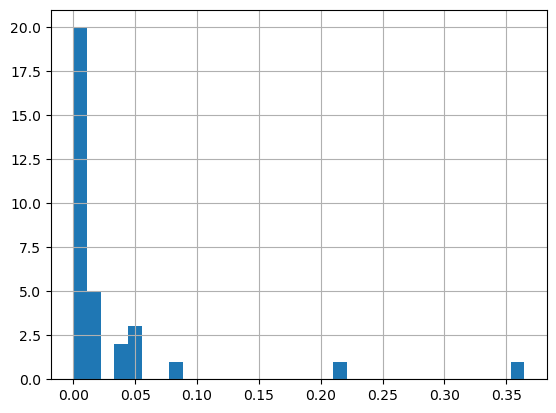

In [14]:
data['Kills %'].hist(bins=len(data['Weapon Name']))